# TO DO:

predictive vs prediction in ml keywords
adjust sliders to be max length

## **Decoding Data Jobs**
##### **using Statistical Analysis, Natural Language Processing, and Classification**
<p align ="right">Zacharia Schmitz <br>
Joshua Click<br>
November 2023

---


###

<b><u>*Required Libraries*</u></b>

1. **numpy:**<br>
    - The fundamental package for scientific computing with Python.<br><br>

2. **pandas:**<br>
    - An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools.<br><br>

3. **matplotlib:**<br>
    - A plotting library for the Python programming language and its numerical mathematics extension NumPy.<br><br>

4. **seaborn:**<br>
    - A Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.<br><br>

5. **nltk:**<br>
    - Natural Language Toolkit, is a library for symbolic and statistical natural language processing for English written in the Python programming language.<br><br>

6. **ipywidgets**:<br> 
    - IPython widgets for interactive data visualization and manipulation.<br><br>

7. **IPython.display**:<br> 
    - Public API for display tools in IPython.<br><br>

8. **plotly.express:**<br> 
    - A terse, consistent, high-level API for rapid data exploration and figure generation.<br><br>

9. **sklearn:**
    - .*pipeline*<br><br>
        - Provides utilities to build a composite estimator, as a chain of transforms and estimators.<br><br>
    - .*model_selection*<br><br>
        - Is a module which includes classes and functions for model selection.<br><br>
    - .*feature_extraction.text*<br><br>
        - Provides classes and functions for text classification.<br><br>
    - .*linear_model*<br><br>
        - Provides functions for fitting linear models.<br><br>
    - .*metrics*<br><br>
        - Includes score functions, performance metrics and pairwise metrics and distance computations.<br><br>

<div style="background-color: #; padding: 0px; ">

## <font size='10'><i>**Plan**</i></font> <font size='5'><i>→ Acquire → Prepare → Explore → Model → Deliver</i></font>

---

- Get da data

- Clean da data

- Explore

- Validate Analysis with Modeling

- Build a deliverable dashboard

### Some things we are expecting to see:

1. Hypothesis

2. Hypothesis

3. Hypothesis

4. Hypothesis

5. Hypothesis

6. Hypothesis

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → </i></font> <font size='10'><i>**Acquire**</i></font> <font size='5'><i> → Prepare → Explore → Model → Deliver</i></font>

---

We originally intended on pulling all of the data myself using LinkedIn webscraping or another job resource.

We were able to scrape LinkedIn, but after reading into it, they've been known to send cease and desist letters.



### **Getting our dataset from Google Jobs**

For decent analysis, we would need a fairly large dataset.

Most job postings do not include salaries. For salary analysis, we needed an even larger dataset to have a decent sample.



#### **1. Use their API**

- You'll need an API key from their [dev website](https://developers.google.com/custom-search/v1/overview)

- You can get 100 search queries per day for free.

- At a cost of $5 per 1,000, you can get up to 10,000.

- The downside to using their API, people often complain that their API results, aren't true to what searches are actually returning.

- We also was not able to see if people could use the API for job posting searches.



#### **2. Scrape the normal result pages**

- While Google does not officially allow it, scraping the search engine results page (SERP) is also an option

- Google seems to have very sophisticated technology when it comes to scraping their pages

- If you scrape at a rate higher than 8 keyword requests per hour you risk detection

- If you push it higher than 10 per hour, this will oftentimes get you blocked

- By using multiple IPs you can up the rate (100 IPs = 1,000 requests)

- There is also an [open source search engine scraper](http://scraping.compunect.com) written in PHP, that can manage proxies and other detection avoidance methods



#### **3. Use a Scraping Service**

- There seem to be many services that offer to do the webscraping

- The one that the Kaggle dataset used to scrape was SerpAPI

- Their cost was as low as $50 for 5,000 searches per month or as high as $250 for 30,000 searches a month



### **We decided to try out scraping with Selenium to be more "human-like"**

```python

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

# Initialize Selenium and navigate to the URL
driver = webdriver.Chrome(executable_path='/path/to/chromedriver')
driver.get('URL')

# Define a function to check if "Load More" exists
def load_more_exists():
    try:
        driver.find_element(By.XPATH, 'XPATH_OF_LOAD_MORE_BUTTON')
        return True
    except NoSuchElementException:
        return False

# Loop to scrape data and click Load More
while True:
    # Scrape data from the current page
    job_elements = driver.find_elements(By.XPATH, 'XPATH_OF_JOB_ELEMENTS')
    for job in job_elements:
        # Extract and save job data
        pass

    # Check if "Load More" exists and click it
    if load_more_exists():
        load_more_button = driver.find_element(By.XPATH, 'XPATH_OF_LOAD_MORE_BUTTON')
        load_more_button.click()
    else:
        break

driver.close()

```
While we were able to scrape the job postings using selenium, for the amount of data that we needed, scraping the data ourselves with the amount of time we had wasn't an option.



### **Pre-Built Dataset**

[Kaggle Dataset](https://www.kaggle.com/code/lukebarousse/data-analyst-skill-analysis/notebook)

- After looking for faster scraping options, we came across a large dataset with 1 year's worth of job postings that were scraped from Google Jobs

- Although a pre-built dataset isn't desired, due to the scale, we decided it was the best way forward

- We acquired the data from a Kaggle dataset that has been scraping "Data Analyst" job postings for the past year. The dataset has 34,153 entries from 3 November 2022 to 2 November 2023.

In [1]:
import pandas as pd
import wrangle as w
from wrangle import (
    keywords,
    keywords_programming,
    keywords_ML_Algorithms,
    keywords_analyst_tools,
    keywords_cloud_tools,
)

In [2]:
# Read in job_scrapes
jobs_df = pd.read_csv("./support_files/jobs.csv")

In [3]:
w.check_columns(jobs_df)

Total rows: 34153
Total columns: 27


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,34153,0,0.00000,"RangeIndex(start=0, stop=34153, step=1)",None
1,Unnamed: 0,int64,34153,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 34152, 17076.0)"
2,index,int64,3785,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 3784, 1141.691418030627)"
3,title,object,13157,0,0.00000,"[Data Analyst, Junior Data Analyst/Scientist R...",None
4,company_name,object,8208,0,0.00000,"[Chloeta, Upwork, ATC, Guidehouse, AnMed Healt...",None
5,location,object,635,24,0.00070,"[ Oklahoma City, OK , Anywhere , United ...",None
6,via,object,556,9,0.00026,"[via ZipRecruiter, via Upwork, via LinkedIn, v...",None
7,description,object,24276,0,0.00000,[Job Summary: The Data Analyst oversees data p...,None
8,extensions,object,5528,0,0.00000,"[['21 hours ago', 'Full-time', 'Health insuran...",None
9,job_id,object,34133,0,0.00000,[eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb...,None


| Field Name | Description |
| --- | --- |
| `Unnamed: 0` | Appears to be an auto-incremented identifier. |
| `index` | Another identifier, possibly redundant with "Unnamed: 0". |
| `title` | Job title. |
| `company_name` | Name of the company offering the job. |
| `location` | Location of the job. |
| `via` | Source/platform where the job was posted. |
| `description` | Detailed description of the job. |
| `extensions` | Additional information about the job (e.g., job type, benefits). |
| `job_id` | A unique identifier for the job, possibly encoded. |
| `thumbnail` | URL to a thumbnail image associated with the job/company. |
| `url` | URL for the job posting. |
| `company_description` | Description of the company. |
| `company_rating` | Company's rating. |
| `rating_count` | Number of ratings the company received. |
| `job_type` | Type of the job (e.g., full-time, part-time). |
| `benefits` | List of benefits provided by the company. |
| `posted` | When the job was posted. |
| `deadline` | Application deadline for the job. |
| `employment_type` | Employment type (e.g., full-time, contract). |
| `commute_time` | Information on commute time, if available. |
| `salary_pay` | Salary payment value, if available. |
| `salary_rate` | Salary rate (e.g., per hour, per year), if available. |
| `salary_avg` | Average salary for the job, if available. |
| `salary_min` | Minimum salary for the job, if available. |
| `salary_max` | Maximum salary for the job, if available. |
| `salary_hourly` | Hourly salary, if available. |
| `salary_yearly` | Yearly salary, if available. |
| `salary_standardized` | Standardized salary information, if available. |
| `description_tokens` | List of skills extracted from the job description. |

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → </i></font> <font size='10'><i>**Prepare**</i></font> <font size='5'><i> → Explore → Model → Deliver</i></font>

--- 

The dataset had some columns that were engineered since the scraping. Due to us wanting reproducability for our own scraped data, we did not use any of the engineered columns from the dataset, and developed our own. We also dropped columns that we do not intend to use.

From the original dataset, we dropped:

### Dataframe Preparation

Download CSV into /support_files/
- [name this "jobs.csv"](https://drive.google.com/file/d/1M5UibWPA48zynbNXbB-ZE9m8LVVn5MRR/view?usp=sharing) - Unprepped .csv (takes 10 minutes to prep)
    
- [name this "prepped_jobs.csv"](https://drive.google.com/file/d/1FsXOyZgzOE0AgniY_hdtzTcmOu2KlDni/view?usp=sharing) - Prepped .csv

In [4]:
jobs_df_cleaned = w.prepare_jobs(jobs_df)

### Drop Columns
*Looking to reduce dimensionality of the dataset*

- Our dataset came with some extra index columns that we dropped

    - `Unnamed: 0`
    - `index`

- These were just columns we didn't see a use for and wanted to reduce dimensionality

    - `extensions` - *Google defined tokens for the posting oftentimes benefits packages. Maybe later.*
    - `thumbnail` - *The companies thumbnail*
    - `search_term` - *All are "Data Analyst"*
    - `search_location` - *All are "United States"*
    - `commute_time` - *All nulls*

- Although our dataset came with the following columns, we wanted to be able to reproduce on unseen data, so we created functions to create these ourselves:

    - `salary_avg`
    - `salary_min`
    - `salary_max`
    - `salary_hourly`
    - `salary_yearly`
    - `salary_standardized`
    - `description_tokens`

### Check for Duplicates

*`job_id` was the only unique column per job posting, turned out to be 20 duplicate posts from scraping*

### Handling Missing Data
*Some columns had nulls. They aren't a big deal for analysis and we won't use those for modeling anyway.*

The only assumptions we imputed to the data was `work_from_home`. 

- This had 55% nulls, and the rest was True.
- We imputed the remaining 45% as False.


`salary` had 82% missing, so most of our jobs don't have the salary included. We decided that was fine and what we had, could still provide insights.

`schedule_type` had minimal nulls, but in the end we only worked with "Full-time" positions anyway. Full-time was 72% of the original dataset.

### Work From Home

`work_from_home` had 55% nulls and the remaining 45% was True. We assumed the remaining 45% was False.

### Feature Engineering - Standardizing Salary
*original dataframe had some weird metrics, and we wanted/needed to do it ourselves for reproducability*

- With the scraped `salary` column they all were not formatted the same. Some examples are:

    - "77K-116K a year"
    - "40-75 an hour"
    - "165K a year"
    - "53 an hour"
    - "4.6K-6K a month"

- From this column, we engineered:

    - `pay_rate` - hourly, monthly, or annually
    - `cleaned_salary` - salary stripped to numbers only

- For the following, we annualized all of the salaries (hourly * 2080, monthly * 12)

    - `min_salary` - lower end of the salary range provided *(or the only digit provided)*
    - `max_salary` - upper end of the salary range provided *(or the only digit provided)*
    - `avg_salary` - average salary between the two ranges *(or the only digit provided)*

### Standardize Location Column
*`location` had 0.07% nulls. We won't drop those, as they will still provide information for non-location based analytics.*

*Some postings had cities in the dataset. We won't be narrowing down that much, so we broadened each posting to the state level, if applicable.*

Our dataset only had the following locations:

| Location             | Percentage |
|----------------------|------------|
| United States        | 33%        |
| Anywhere             | 29%        |
| Missouri             | 14%        |
| Oklahoma             | 8%         |
| Kansas               | 7%         |
| Arkansas             | 6%         |
| California           | 0.4%       |
| Multiple Locations   | 0.17%      |
| Texas                | 0.14%      |
| Unknown              | 0.09%      |
| Nebraska             | 0.04%      |
| Massachusetts        | 0.04%      |
| New York             | 0.03%      |
| Pennsylvania         | 0.02%      |
| District of Columbia | 0.01%      |
| New Jersey           | 0.004%     |
| Connecticut          | 0.004%     |

### Date Formatting
*feature engineered a `posting_created` column*

Our dataframe had `date_time`, which was the date and time that the data was scraped, we converted this to date_time type and renamed to `date_scraped`

We also had a `posted_at`, fromatted as "X hours ago", which was when the posting was created. We made this a timedelta type.

With both of those columns, we created `posting_created`, by subtracting timedelta, from the date_time.

### Standardize Job Title

`title` originally had 13,157 different values in the dataset. We standardized these into `title_cleaned` by:
- Data Scientist - titles containing "scie"
- Data Engineer - titles containing "eng"
- Data Analyst - titles containing "ana"
- Other - if it didn't fit any of these

We dropped "Other". We did not include it in our model predictions, since there was no value in predicting it.

Some examples of "Other" titles were:
- "Trillium Data Quality"
- "Systematic review"
- "GA4 full setup + Conversion and Pixel API setup"

### Job Description NLP Processing

`description` was the job description in it's scraped format.

We made `description_cleaned`, which was a tokenized, normalized, and lemmatized version of `description`

From `description_cleaned`, we pulled out categories of keywords related to data jobs. The categories we looked at were:
- programming languages
- machine learning algorithms
- visualization tools
- big data tools
- cloud tools
- business intelligence

With the words we defined from these categories, we created `description_tokens`.

#### Creation of `description_cleaned`
*We used `punkt` (for sentence tokenization) and standard `stopwords` for tokenizing, normalizing, and lemmatizing*

#### Define Keywords for `description_tokenized`

*We selected some keywords that identify into certain data categories. Then we checked the description for single occurences of these words and assigned it to `description_tokens`*

| Analyst Tools       | Programming Languages | Business Intelligence | Big Data           | ML Algorithms                                | Visualization Tools       | Cloud Tools   | Computer Vision & NLP        |
|---------------------|-----------------------|-----------------------|--------------------|---------------------------------------------|---------------------------|---------------|------------------------------|
| excel               | sql                   | tableau               | mysql              | regression                                  | matplotlib                | aws           | computer vision             |
| tableau             | python                | power bi              | postgresql         | clustering                                  | seaborn                   | azure         | natural language processing |
| word                | r                     | power_bi              | microsoft sql      | classification                              | plotly                    | gcp           |                              |
| powerpoint          | c                     | google data studio    | sqlite             | predictive                                  | ggplot                    | snowflake     |                              |
| looker              | c#                    | quicksight            | mongodb            | prediction                                  | shiny                     | redshift      |                              |
| powerbi             | javascript            | qlik sense            | bigquery           | decision trees                              | geoplotlib                | bigquery      |                              |
| outlook             | js                    | azure synapse         | oracle database    | random forests                              | bokeh                     | aurora        |                              |
| azure               | java                  | looker                | azure sql          | cnn                                         | d3 js                     | amazon        |                              |
| jira                | scala                 | alteryx               | amazon rds         | gradient boosting                           | leaflet / folium          | ec2           |                              |
| twilio              | sas                   | sap analytics cloud   | google cloud sql   | bayesian approaches                         | pygal                     | s3            |                              |
| snowflake           | matlab                | tibco spotfire        | snowflake          | dense neural networks                       | altair                    |               |                              |
| shell               | c++                   | domo                  |                    | mlp                                         | dygraphs                  |               |                              |
| linux               | c/c++                 | sisense               |                    | rnn                                         | highcharter               |               |                              |
| sas                 | perl                  | thoughtspot           |                    | transformer networks                        | tableau                   |               |                              |
| sharepoint          | go                    |                       |                    | bert                                        | microsoft power bi        |               |                              |
| mysql               | typescript            |                       |                    | gpt-3                                       | google data studio        |               |                              |
| visio               | bash                  |                       |                    | graph neural networks                       | amazon quicksight         |               |                              |
| git                 | html                  |                       |                    | autoencoder networks                        | qlik sense                |               |                              |
| mssql               | css                   |                       |                    | dae                                         | azure synapse             |               |                              |
| powerpoints         | php                   |                       |                    | vae                                         | looker                    |               |                              |
| postgresql          | powershell            |                       |                    | gan                                         | alteryx                   |               |                              |
| spreadsheets        | rust                  |                       |                    | evolutionary approaches                     | sap analytics cloud       |               |                              |
| seaborn             | kotlin                |                       |                    |                                             | tibco spotfire            |               |                              |
| pandas              | ruby                  |                       |                    |                                             | domo                      |               |                              |
| gdpr                | dart                  |                       |                    |                                             | sisense                   |               |                              |
| spreadsheet         | assembly              |                       |                    |                                             | thoughtspot               |               |                              |
| alteryx             | swift                 |                       |                    |                                             |                           |               |                              |
| github              | vba                   |                       |                    |                                             |                           |               |                              |
| postgres            | lua                   |                       |                    |                                             |                           |               |                              |
| ssis                | groovy                |                       |                    |                                             |                           |               |                              |
| numpy               | delphi                |                       |                    |                                             |                           |               |                              |
| power_bi            | objective-c           |                       |                    |                                             |                           |               |                              |
| spss                | haskell               |                       |                    |                                             |                           |               |                              |
| ssrs                | elixir                |                       |                    |                                             |                           |               |                              |
| microstrategy       | julia                 |                       |                    |                                             |                           |               |                              |
| cognos              | clojure               |                       |                    |                                             |                           |               |                              |
| dax                 | solidity              |                       |                    |                                             |                           |               |                              |
| matplotlib          | lisp                  |                       |                    |                                             |                           |               |                              |
| dplyr               | f#                    |                       |                    |                                             |                           |               |                              |
| tidyr               | fortran               |                       |                    |                                             |                           |               |                              |
| ggplot2             | erlang                |                       |                    |                                             |                           |               |                              |
| plotly              | apl                   |                       |                    |                                             |                           |               |                              |
| esquisse            | cobol                 |                       |                    |                                             |                           |               |                              |
| rshiny              | ocaml                 |                       |                    |                                             |                           |               |                              |
| mlr                 | crystal               |                       |                    |                                             |                           |               |                              |
| docker              | javascript/typescript |                       |                    |                                             |                           |               |                              |
| linux               | golang                |                       |                    |                                             |                           |               |                              |
| jira                | nosql                 |                       |                    |                                             |                           |               |                              |
| hadoop              | mongodb               |                       |                    |                                             |                           |               |                              |
| airflow             | t-sql                 |                       |                    |                                             |                           |               |                              |
| redis               | no-sql                |                       |                    |                                             |                           |               |                              |
| graphql             | visual_basic          |                       |                    |                                             |                           |               |                              |
| sap                 | pascal                |                       |                    |                                             |                           |               |                              |
| tensorflow          | mongo                 |                       |                    |                                             |                           |               |                              |
| node                | pl/sql                |                       |                    |                                             |                           |               |                              |
| asp.net             | sass                  |                       |                    |                                             |                           |               |                              |
| unix                | vb.net                |                       |                    |                                             |                           |               |                              |
| jquery              | mssql                 |                       |                    |                                             |                           |               |                              |
| pyspark             |                       |                       |                    |                                             |                           |               |                              |
| pytorch             |                       |                       |                    |                                             |                           |               |                              |
| gitlab              |                       |                       |                    |                                             |                           |               |                              |
| selenium            |                       |                       |                    |                                             |                           |               |                              |
| splunk              |                       |                       |                    |                                             |                           |               |                              |
| bitbucket           |                       |                       |                    |                                             |                           |               |                              |
| qlik                |                       |                       |                    |                                             |                           |               |                              |
| terminal            |                       |                       |                    |                                             |                           |               |                              |
| atlassian           |                       |                       |                    |                                             |                           |               |                              |
| unix/linux          |                       |                       |                    |                                             |                           |               |                              |
| linux/unix          |                       |                       |                    |                                             |                           |               |                              |
| ubuntu              |                       |                       |                    |                                             |                           |               |                              |
| nuix                |                       |                       |                    |                                             |                           |               |                              |
| datarobot           |                       |                       |                    |                                             |                           |               |                              |


### Schedule Types

`schedule_type` contained many different values, and comparing freelance work to full-time, wasn't accurate and skewed the metrics.

During exploration it was identified that contract (typically freelance) positions tend to pay a lot more than full time.
- Some of these positions were offering up to $750 an hour
- This caused issues when we annualized the pay (multiplied by 2080 for hourly)

Freelance work is typically not something for entry level positions, so for now we will only look into full-time positions.

### Identify Further Words to Remove

In [5]:
# List of words to remove
words_to_remove = ['data', 'experience']

# Function to remove specific words
def remove_words(word_list):
    return [word for word in word_list if word not in words_to_remove]

jobs_df_cleaned["description_cleaned"] = jobs_df_cleaned["description_cleaned"].apply(remove_words)

### Narrow down to what we want

We either feature engineered columns using these, or decided not to use them for now.

For our analysis and modeling, we'll only be using the following columns:

In [6]:
jobs_df_cleaned = jobs_df_cleaned[
[# 'title',
 'company_name',
 # 'location',
 'via',
 # 'description',
 'posted_at',
 # 'schedule_type',
 'work_from_home',
 # 'date_scraped',
 # 'salary_pay',
 # 'salary_rate',
 # 'cleaned_salary',
 # 'pay_rate',
 # 'min_salary',
 # 'max_salary',
 'avg_salary',
 'location_cleaned',
 'posting_created',
 'title_cleaned',
 'description_cleaned',
 'description_tokens']
]

### Check out the final dataframe

In [7]:
jobs_df_cleaned['title_cleaned'].value_counts()


title_cleaned
Data Analyst      22316
Data Scientist     1109
Data Engineer       761
Name: count, dtype: int64

In [8]:
w.check_columns(jobs_df_cleaned)

Total rows: 24186
Total columns: 10


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,datetime64[ns],6854,0,0.00000,"DatetimeIndex(['2023-08-02 06:00:00', '2023-08...","(2022-11-03, 2023-11-02)"
1,company_name,object,7102,0,0.00000,"[Chloeta, ATC, Guidehouse, Oregon Health & Sci...",None
2,via,object,520,9,0.00037,"[via ZipRecruiter, via LinkedIn, via Nexxt, vi...",None
3,posted_at,object,54,0,0.00000,"[0 days 21:00:00, 0 days 12:00:00, 0 days 10:0...",None
4,work_from_home,bool,2,0,0.00000,"[False, True]","(False, True, 0.28843132390639215)"
5,avg_salary,float64,485,21670,0.89597,"[nan, 94640.0, 48391.2, 68516.5, 70000.0, 1250...","(24960.0, 288000.0, 98228.84103736088)"
6,location_cleaned,object,17,0,0.00000,"[Oklahoma, United States, Kansas, Anywhere, Ar...",None
7,posting_created,object,6854,0,0.00000,"[2023-08-02 06:00, 2023-08-02 15:00, 2023-08-0...",None
8,title_cleaned,object,3,0,0.00000,"[Data Analyst, Data Engineer, Data Scientist]",None
9,description_cleaned,object,ERROR,0,0.00000,Column contains multiple lists,None


<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → </i></font> <font size='10'><i>**Explore**</i></font> <font size='5'><i>→ Model → Deliver</i></font>
---

In [9]:
import plotly.express as px
import pandas as pd
from collections import Counter
import plotly.graph_objs as go

# List of words to remove
words_to_remove = ['data', 'experience', 'business', 'work']

# Function to remove specific words
def remove_words(word_list):
    return [word for word in word_list if word not in words_to_remove]

jobs_df_cleaned["description_cleaned"] = jobs_df_cleaned["description_cleaned"].apply(remove_words)

def plot_top_words_frequency_with_plotly(df):
    # Function to get top words
    def get_top_words(df2, title, n=10, words_to_exclude=set()):
        if title == 'All Titles':
            descriptions = df2['description_cleaned']
        else:
            descriptions = df2[df2['title_cleaned'] == title]['description_cleaned']

        word_counts = Counter()
        for description in descriptions:
            words = set(str(description).split())  # Use a set to remove duplicates
            word_counts.update(words)

        total_descriptions = len(descriptions)

        # Normalize the word counts
        word_counts = {word: count / total_descriptions for word, count in word_counts.items() if word not in words_to_exclude}

        # Sort the dictionary items by value and take the top n items
        top_words = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:n]

        return top_words

    def plot_top_words_frequency_with_plotly(df):
        # Get the common words in 'All Titles'
        common_words = {word for word, freq in get_top_words(df, 'All Titles') if freq > 0.5}

        # Dropdown options
        titles = df['title_cleaned'].unique()
        titles = [title for title in titles if title != 'Other']  # Exclude 'Other'
        titles.insert(0, 'All Titles')  # Option for all titles

        # Create a figure with a dropdown menu and slider
        fig = go.Figure()

        # Add traces for each title
        for title in titles:
            top_words = get_top_words(df, title, words_to_exclude=(common_words if title != 'All Titles' else set()))
            words, frequencies = zip(*top_words)
            fig.add_trace(
                go.Bar(
                    x=frequencies,
                    y=words,
                    name=title,
                    orientation='h',
                    visible=(title == 'All Titles')  # Only the 'All Titles' trace is visible initially
                )
            )

        # Update layout
        fig.update_layout(
            updatemenus=[
                dict(
                    buttons=[dict(label=title,
                                method="update",
                                args=[{"visible": [title == t for t in titles]},
                                        {"title": f"Top Words in {title}"}])
                            for title in titles],
                    direction="down",
                    showactive=True,
                )
            ]
        )

        fig.show()

    plot_top_words_frequency_with_plotly(jobs_df_cleaned)

plot_top_words_frequency_with_plotly(jobs_df_cleaned)

In [10]:
import plotly.express as px
import pandas as pd
from collections import Counter
import plotly.graph_objs as go

# List of words to remove
words_to_remove = ['data', 'experience', 'business', 'work']

# Function to remove specific words
def remove_words(word_list):
    return [word for word in word_list if word not in words_to_remove]

jobs_df_cleaned["description_cleaned"] = jobs_df_cleaned["description_cleaned"].apply(remove_words)

def plot_top_words_frequency_with_plotly(df):
    # Function to get top words
    def get_top_words(df2, title, n=10):
        if title == 'All Titles':
            descriptions = df2['description_cleaned']
        else:
            descriptions = df2[df2['title_cleaned'] == title]['description_cleaned']

        word_counts = Counter()
        for description in descriptions:
            words = set(str(description).split())  # Use a set to remove duplicates
            word_counts.update(words)

        total_descriptions = len(descriptions)

        # Normalize the word counts
        word_counts = {word: count / total_descriptions for word, count in word_counts.items()}

        # Sort the dictionary items by value and take the top n items
        top_words = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:n]

        return top_words

    # Dropdown options
    titles = df['title_cleaned'].unique()
    titles = [title for title in titles if title != 'Other']  # Exclude 'Other'
    titles.insert(0, 'All Titles')  # Option for all titles

    # Create a figure with a dropdown menu and slider
    fig = go.Figure()

    # Add traces for each title
    for title in titles:
        top_words = get_top_words(df, title)
        words, frequencies = zip(*top_words)
        fig.add_trace(
            go.Bar(
                x=frequencies,
                y=words,
                name=title,
                orientation='h',
                visible=(title == 'All Titles')  # Only the 'All Titles' trace is visible initially
            )
        )

    # Update layout
    fig.update_layout(
        updatemenus=[
            dict(
                buttons=[dict(label=title,
                              method="update",
                              args=[{"visible": [title == t for t in titles]},
                                    {"title": f"Top Words in {title}"}])
                        for title in titles],
                direction="down",
                showactive=True,
            )
        ]
    )

    fig.show()


plot_top_words_frequency_with_plotly(jobs_df_cleaned)

In [11]:
w.check_columns(jobs_df_cleaned)

Total rows: 24186
Total columns: 10


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,datetime64[ns],6854,0,0.00000,"DatetimeIndex(['2023-08-02 06:00:00', '2023-08...","(2022-11-03, 2023-11-02)"
1,company_name,object,7102,0,0.00000,"[Chloeta, ATC, Guidehouse, Oregon Health & Sci...",None
2,via,object,520,9,0.00037,"[via ZipRecruiter, via LinkedIn, via Nexxt, vi...",None
3,posted_at,object,54,0,0.00000,"[0 days 21:00:00, 0 days 12:00:00, 0 days 10:0...",None
4,work_from_home,bool,2,0,0.00000,"[False, True]","(False, True, 0.28843132390639215)"
5,avg_salary,float64,485,21670,0.89597,"[nan, 94640.0, 48391.2, 68516.5, 70000.0, 1250...","(24960.0, 288000.0, 98228.84103736088)"
6,location_cleaned,object,17,0,0.00000,"[Oklahoma, United States, Kansas, Anywhere, Ar...",None
7,posting_created,object,6854,0,0.00000,"[2023-08-02 06:00, 2023-08-02 15:00, 2023-08-0...",None
8,title_cleaned,object,3,0,0.00000,"[Data Analyst, Data Engineer, Data Scientist]",None
9,description_cleaned,object,ERROR,0,0.00000,Column contains multiple lists,None


### Questions

1. What companies have the most job postings?

2. What is the location spread for our dataset?

3. Within the Google Jobs search, which site has the most postings? 

4. What words are most common in data job descriptions

5. What are the overall top things to learn for data jobs?

6. Do a majority of places allow wor from home or want you in the work place?

7. What skills are most prevalent in our postings for programming languages, ML Algorithyms, tools? 

8. When do we see most data jobs being posted?

9. What are top skills overall?

### Train, Validate, & Test Splits

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (Our validate will be generated during GridSearch)
train, test = train_test_split(
    jobs_df_cleaned, train_size=0.8, test_size=0.2, random_state=321
)

# Print sizes, length of set and ratio of total
print(f"Train size: {len(train)} ({len(train) / len(jobs_df_cleaned):.2%})")
print(f"Test size: {len(test)} ({len(test) / len(jobs_df_cleaned):.2%})")

Train size: 19348 (80.00%)
Test size: 4838 (20.00%)


### What companies have the most job postings?

The function eda_plot takes the dataframe, the column, and the specified number 'n' that you would like to see plotted in a bar graph.

company_name
Walmart                             876
Talentify.io                        628
EDWARD JONES                        584
Corporate                           460
Cox Communications                  425
Centene Corporation                 155
Staffigo Technical Services, LLC    138
Insight Global                      137
Dice                                 99
Jobot                                85
Name: count, dtype: int64

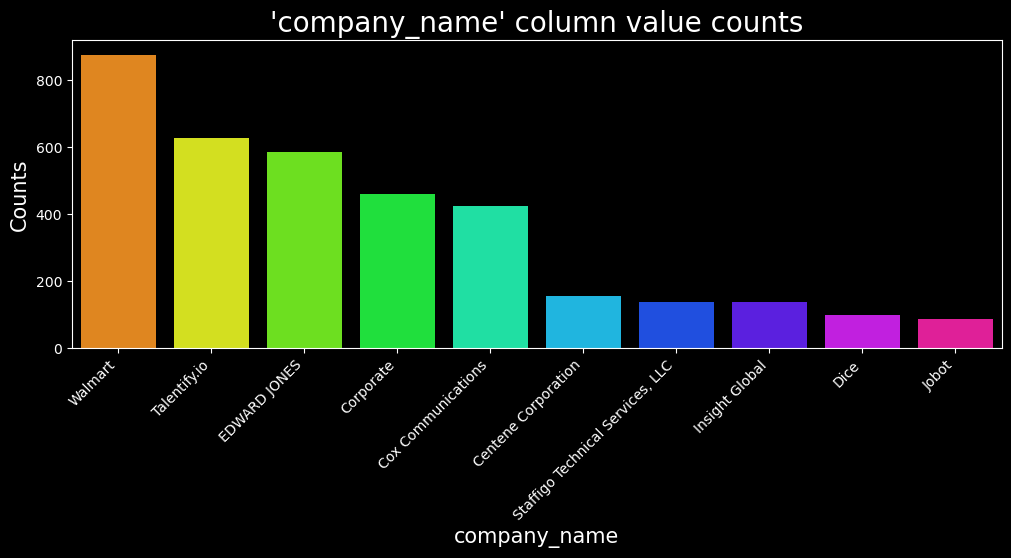

In [13]:
w.eda_plot(train, "company_name", topn=10)

Breaking it down by `company_name` we can see the top 10 companies with the most job postings.

### What is the location spread for our dataset?

location_cleaned
United States         6576
Anywhere              5581
Missouri              2790
Oklahoma              1560
Kansas                1421
Arkansas              1247
California              70
Multiple Locations      32
Name: count, dtype: int64

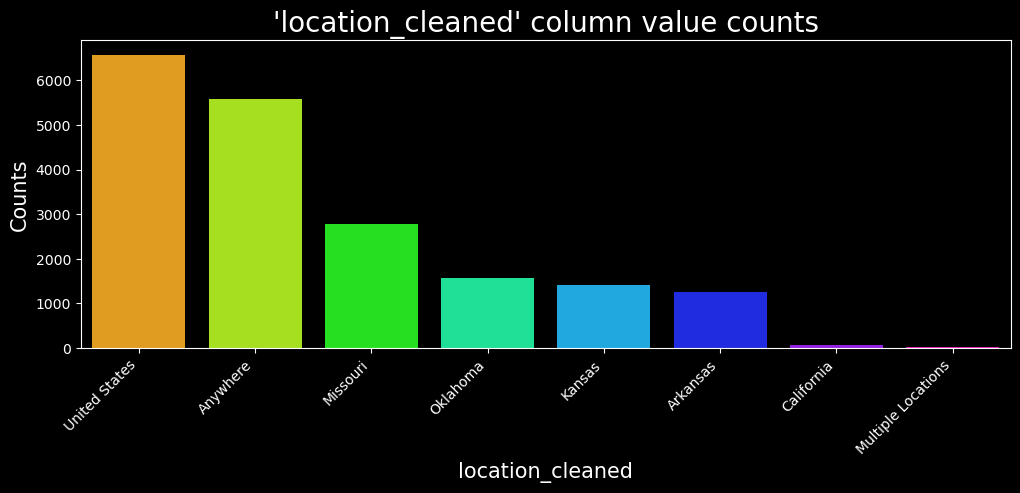

In [14]:
w.eda_plot(train, "location_cleaned", topn=8)

We thought we had a dataframe of jobs from the entire U.S., but with further evaluation, it seems that the dataset maybe has IP address issues where the person collected the data.

### Within the Google Jobs search, which site has the most postings?

via
via LinkedIn        6430
via BeBee           2575
via Trabajo.org     2124
via ZipRecruiter    1487
via Indeed           999
Name: count, dtype: int64

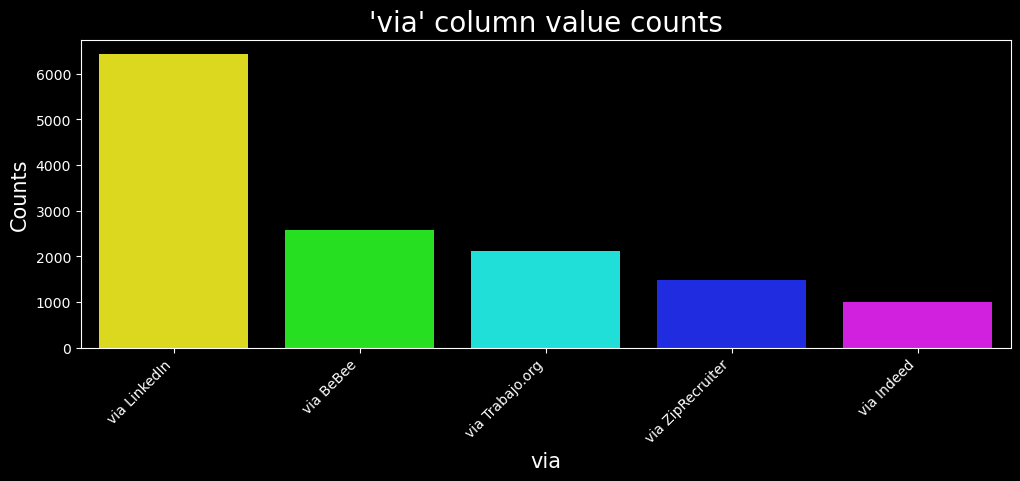

In [15]:
w.eda_plot(train, "via", topn=5)

LinkedIn is almost half the dataframe of postings.

### What words are most common in data job descriptions?

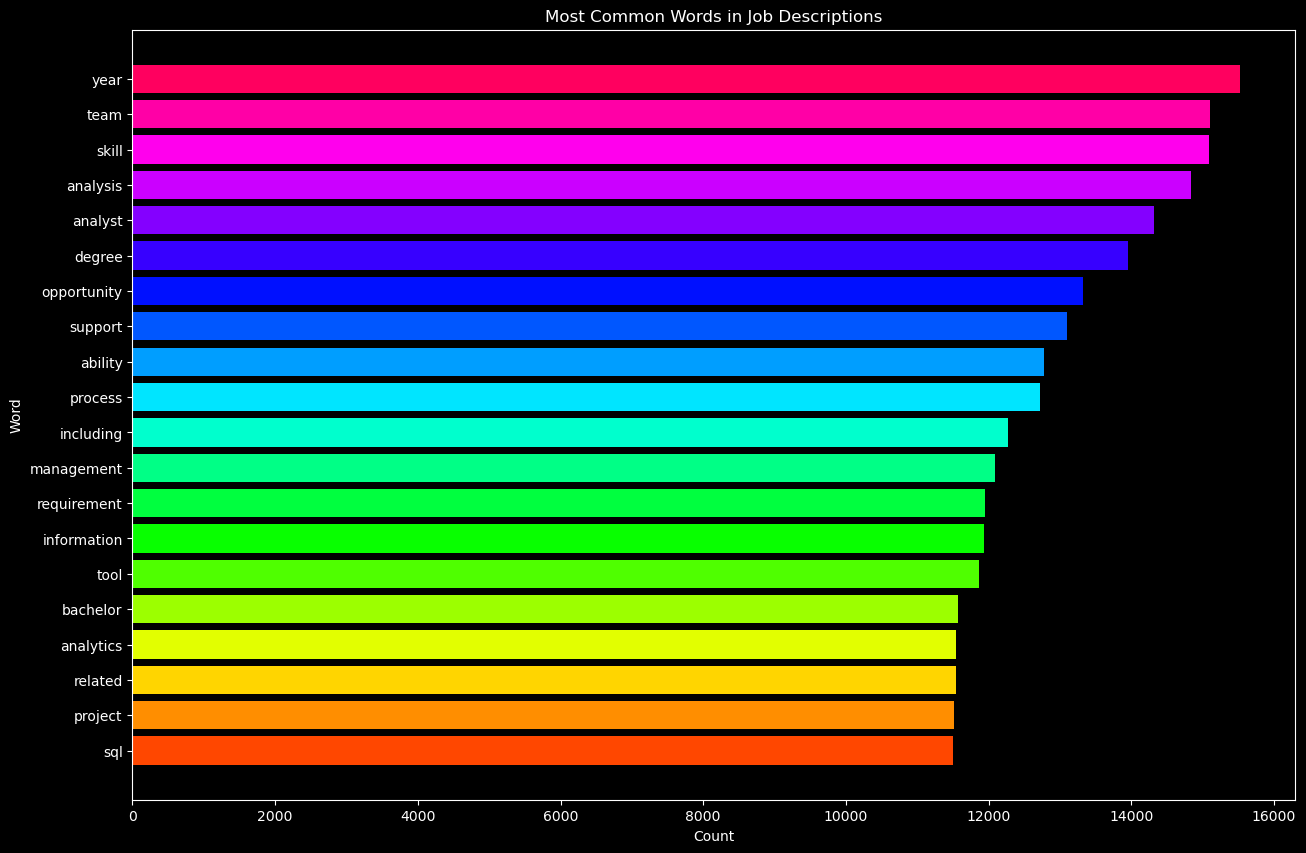

In [16]:
w.plot_most_common_words(train, "description_cleaned", 20)

### Do a majority of places allow work from home or want you in the work place?
<i> Remember this is full time only </i>

work_from_home
False    13767
True      5581
Name: count, dtype: int64

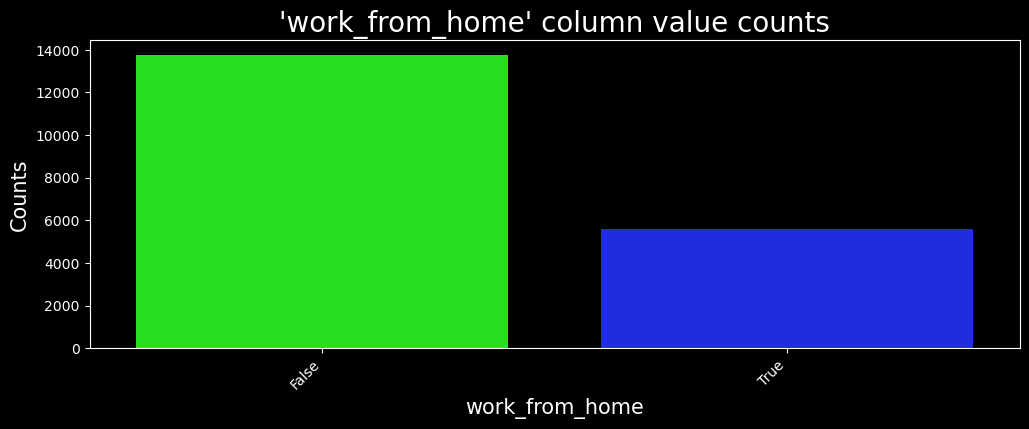

In [17]:
w.eda_plot(train, "work_from_home", topn=2)

We placed the 'Full-time' positions only and created a bool of the `work_from_home ` values. It seems that work from home is far less than office work.

### What are the overall top things to learn for data jobs?

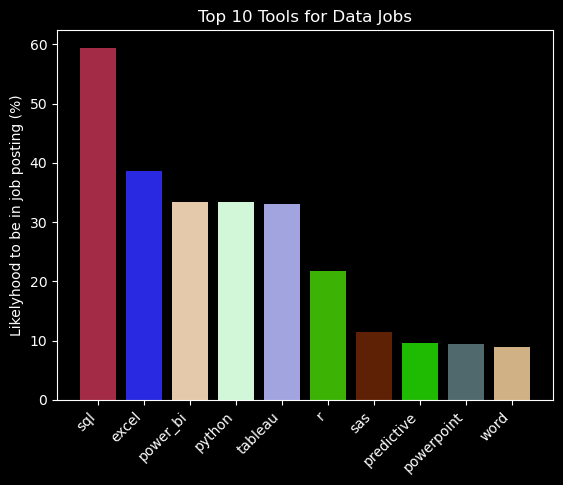

In [18]:
w.filtered_keywords(train, keywords, title="Tools", head=10)

It seems the most common are 'sql' and 'excel', with 'python', 'power_bi', and 'tableau'following close behind.

### What are the most common programming languages in data jobs?

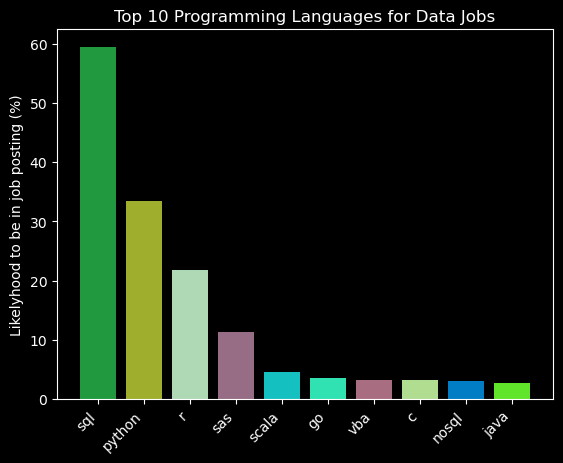

In [19]:
w.filtered_keywords(train, keywords_programming, title="Programming Languages", head=10)

Again, 'sql' is a top result. 

### What are the most common Machine Learning principles for data jobs?

The filtered_keywords function takes keywords that are defined in the wrangle.py and the dataframe to pull job post descriptions and create a bar graph.

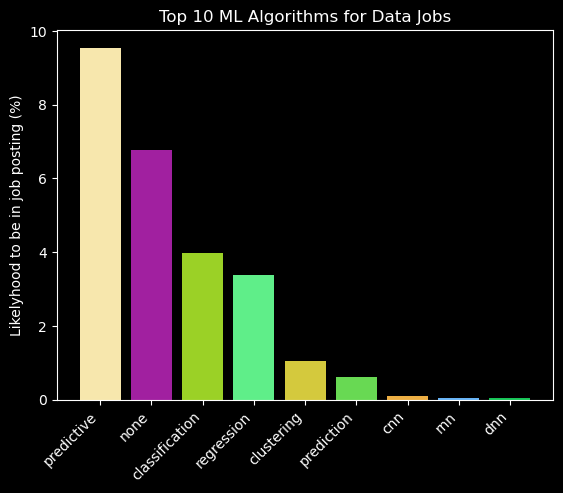

In [20]:
w.filtered_keywords(train, keywords_ML_Algorithms, title="ML Algorithms")

It seems the job post keep the ML algorithms pretty vague for most of the job posts by the use of 'predictive'.

### When do we see most data jobs being posted?

The plot_monthly_postings function takes the datetime column and creates a bar chart based off of the dates of the jobs posting. 

In [21]:
# Make posting_created dt
train["posting_created"] = pd.to_datetime(train["posting_created"])

# Tell me how many postings each month had
train.posting_created.dt.month.value_counts().sort_index()

posting_created
1     2234
2     1668
3     1568
4     1374
5     1342
6     1330
7     1460
8     1976
9     1495
10    1664
11    1271
12    1966
Name: count, dtype: int64

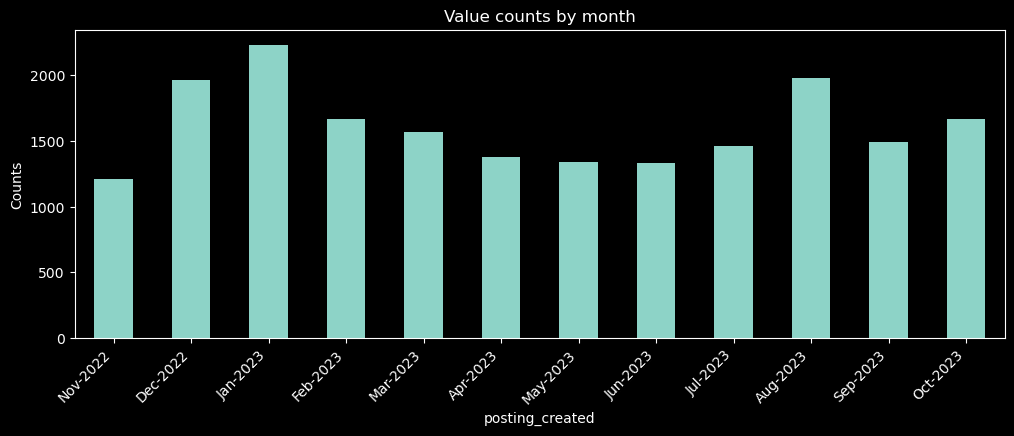

In [22]:
w.plot_monthly_postings(train)

The spikes in Dec and Jan seem to be related to start of New Year hiring pushes. 

### Dataframe Generation for Interactive Plots

In [23]:
# Get the top skills
top_skills_df = w.get_top_skills(train, qty=100)

### What are top skills overall?

In [24]:
w.create_skill_plot(top_skills_df)

Dropdown(description='Skill Category:', options=(('All Skills', ['sql', 'python', 'r', 'c', 'c#', 'javascript'…

IntSlider(value=10, description='Number of Skills:', max=50, min=1)

Button(description='Plot', style=ButtonStyle())

### A deeper look into individual skills

In [25]:
from ipywidgets import widgets

w.create_interactive_salary_plot(train, top_skills_df)

Dropdown(description='Skill:', options=('airflow', 'alteryx', 'amazon', 'asp.net', 'assembly', 'atlassian', 'a…

Button(description='Plot', style=ButtonStyle())

### Job title specific skills

In [26]:
w.create_skill_postings_plot(train)

IntSlider(value=10, description='Top skills:', max=50, min=1)

Dropdown(description='Job title:', options=('All Data Jobs', 'Data Analyst', 'Data Engineer', 'Data Scientist'…

Button(description='Update Plot', style=ButtonStyle())

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → Explore → </i></font> <font size='10'><i>**Model**</i></font> <font size='5'><i>→ Deliver</i></font>
---

Useful hyperparameters for `TfidfVectorizer`:

- `max_features`: This hyperparameter controls the maximum number of features (i.e., terms) to include in the TF-IDF matrix. Setting this to a smaller value can help reduce the dimensionality of the matrix and improve performance, especially if the dataset is large.

- `min_df` and `max_df`: These hyperparameters control the minimum and maximum document frequency of terms to include in the TF-IDF matrix. Setting `min_df` to a higher value will exclude terms that appear in fewer than `min_df` documents, while setting `max_df` to a lower value will exclude terms that appear in more than `max_df` documents. These can be useful for removing very rare or very common terms that may not be informative.

- `ngram_range`: This hyperparameter controls the range of n-grams to include in the TF-IDF matrix. An n-gram is a contiguous sequence of n words in a document. Setting `ngram_range` to `(1, 1)` will include only unigrams (i.e., single words), while setting it to `(1, 2)` will include both unigrams and bigrams (i.e., pairs of words).

- `stop_words`: This hyperparameter can be set to a list of stop words to exclude from the TF-IDF matrix. Stop words are common words that are unlikely to be informative, such as "the", "and", and "of".

- `tokenizer`: This hyperparameter can be set to a custom tokenizer function to use instead of the default tokenizer. The tokenizer function should take a string as input and return a list of tokens (i.e., words).

These hyperparameters can be tuned to improve the performance of the TF-IDF vectorization for a specific task or dataset.

### Unbalanced Dataset Modeling (Precision Metric)

#### X and Y Splits for Modeling

In [27]:
# Drop Other
jobs_unbalanced = train[train["title_cleaned"] != "Other"]

In [28]:
# Make X variatons without target variables
X_train_unbalanced = jobs_unbalanced["description_cleaned"]
X_test_unbalanced = test["description_cleaned"]

# Make y variables with target variables
y_train_unbalanced = jobs_unbalanced["title_cleaned"]
y_test_unbalanced = test["title_cleaned"]

print(f"Train Set:")
print(f"X_train size: {len(X_train_unbalanced)}")
print(f"y_train size: {len(y_train_unbalanced)}")

print(f"\nTest Set:")
print(f"X_test size: {len(X_test_unbalanced)}")
print(f"y_test size: {len(y_test_unbalanced)}")

Train Set:
X_train size: 19348
y_train size: 19348

Test Set:
X_test size: 4838
y_test size: 4838


#### Establishing Baseline

In [29]:
# Value counts for titles in train set
y_train_unbalanced.value_counts(normalize=True)

title_cleaned
Data Analyst      0.923093
Data Scientist    0.046051
Data Engineer     0.030856
Name: proportion, dtype: float64

Baseline is 92%

#### Gridsearch Pipeline for TF-IDF & Logistic Regression (Unbalanced)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

#### Pipeline GridSearch Results

#### Evaluate Best Unbalanced Model on Test

In [31]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression

# Convert X sets to be readable by TF-IDF
X_train_unbalanced = X_train_unbalanced.astype(str).str.replace(
    r"[\[\],'']", "", regex=True
)
X_test_unbalanced = X_test_unbalanced.astype(str).str.replace(
    r"[\[\],'']", "", regex=True
)

tfidf = TfidfVectorizer(max_df=1000, max_features=1000, min_df=100, ngram_range=(1, 2))
X_train_unbalanced_tfidf = tfidf.fit_transform(X_train_unbalanced)
X_test_unbalanced_tfidf = tfidf.transform(X_test_unbalanced)

# Train a Logistic Regression model
logit = LogisticRegression(C=5, penalty="l2", random_state=321, max_iter=1000)
logit.fit(X_train_unbalanced_tfidf, y_train_unbalanced)

# Calculate the accuracy of the model
# print(f"Logistic Regression Train Accuracy: {logit.score(X_train_unbalanced_tfidf, y_train_unbalanced)}")

# Predict the training labels
y_train_pred = logit.predict(X_train_unbalanced_tfidf)

# Calculate the precision of the model
precision = precision_score(y_train_unbalanced, y_train_pred, average="weighted")

print(f"Logistic Regression Train Precision: {precision}")

Logistic Regression Train Precision: 0.9524932524878748


In [32]:
from sklearn.metrics import precision_score

# Predict the test labels
y_test_pred = logit.predict(X_test_unbalanced_tfidf)

# Calculate the precision of the model
precision = precision_score(y_test_unbalanced, y_test_pred, average="weighted")

print(f"Logistic Regression Test Precision: {precision}")

Logistic Regression Test Precision: 0.9288264200920976


### Balanced Dataset (Accuracy Metric)

#### Balancing the Dataset

In [33]:
# Pull in our variable

jobs_df_cleaned["title_cleaned"].value_counts()

title_cleaned
Data Analyst      22316
Data Scientist     1109
Data Engineer       761
Name: count, dtype: int64

Lowest represented in our dataset is data engineer at 761. We'll sample down to that, with a random state for reproducability.

In [34]:
# Sample to 761
eng = jobs_df_cleaned[jobs_df_cleaned["title_cleaned"] == "Data Engineer"].sample(
    761, random_state=321
)

# Sample to 761
sci = jobs_df_cleaned[jobs_df_cleaned["title_cleaned"] == "Data Scientist"].sample(
    761, random_state=321
)

# Sample to 761
ana = jobs_df_cleaned[jobs_df_cleaned["title_cleaned"] == "Data Analyst"].sample(
    761, random_state=321
)

# Concat all 3
jobs_balanced = pd.concat([eng, sci, ana])

# Value counts for titles after sampling
jobs_balanced.title_cleaned.value_counts()

title_cleaned
Data Engineer     761
Data Scientist    761
Data Analyst      761
Name: count, dtype: int64

#### Train & Test Splits

In [35]:
# Split the data into train_balanced and test_balanced sets (Our validate will be generated during GridSearch)
train_balanced, test_balanced = train_test_split(
    jobs_balanced, train_size=0.8, test_size=0.2, random_state=321
)

# Print sizes, length of set and ratio of total
print(
    f"Train size: {len(train_balanced)} ({len(train_balanced) / len(jobs_balanced):.2%})"
)
print(
    f"Test size: {len(test_balanced)} ({len(test_balanced) / len(jobs_balanced):.2%})"
)

Train size: 1826 (79.98%)
Test size: 457 (20.02%)


#### X and Y Splits for Modeling

In [36]:
# Make X variatons without target variables
X_train_balanced = train_balanced["description_cleaned"]
X_test_balanced = test_balanced["description_cleaned"]

# Make y variables with target variables
y_train_balanced = train_balanced["title_cleaned"]
y_test_balanced = test_balanced["title_cleaned"]

print(f"Train Set:")
print(f"X_train size: {len(X_train_balanced)}")
print(f"y_train size: {len(y_train_balanced)}")

print(f"\nTest Set:")
print(f"X_test size: {len(X_test_balanced)}")
print(f"y_test size: {len(y_test_balanced)}")

Train Set:
X_train size: 1826
y_train size: 1826

Test Set:
X_test size: 457
y_test size: 457


#### Baseline

In [37]:
# Verify we're still roughly balanced, and get our baseline
y_train_balanced.value_counts(normalize=True)

title_cleaned
Data Scientist    0.337349
Data Engineer     0.335706
Data Analyst      0.326944
Name: proportion, dtype: float64

With an balanced dataset and 3 targets, our baseline comes in at 33%

#### Gridsearch Pipeline for TF-IDF & Logistic Regression (Balanced)

In [38]:
# Convert X sets to be readable by TF-IDF
X_train_balanced = X_train_balanced.astype(str).str.replace(
    r"[\[\],'']", "", regex=True
)
X_test_balanced = X_test_balanced.astype(str).str.replace(r"[\[\],'']", "", regex=True)

#### Pipeline Gridsearch Results

#### Evalute Best Model on Test

In [39]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=1000, max_features=750, min_df=50, ngram_range=(1, 2))
X_train_balanced = tfidf.fit_transform(X_train_balanced)
X_test_balanced = tfidf.transform(X_test_balanced)

# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=5, penalty="l2", random_state=321, max_iter=1000)
logit.fit(X_train_balanced, y_train_balanced)

# Calculate the accuracy of the model
print(
    f"Logistic Regression Train Accuracy: {logit.score(X_train_balanced, y_train_balanced)}"
)

Logistic Regression Train Accuracy: 0.9665936473165389


In [40]:
print(
    f"Logistic Regression Test Accuracy: {logit.score(X_test_balanced, y_test_balanced)}"
)

Logistic Regression Test Accuracy: 0.849015317286652


<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → Explore → Model →</i></font> <font size='10'><i>**Deliver**</i></font>
---

### Takeaways & Recommendation


#### During Data Collection:



- Decided to use the 'Full-Time' positions only to deal with outliers
    - Freelance jobs will often pay much more, but don't guarantee employment or have benefits
    - Freelance jobs also are not very applicable to entry level applicants

- Trying to categorize by `sector` proved to be too inaccurate from the nature of the descriptions in the job posts
    - Being able to <i>accurately</i> categorize by sector would add value, but would take too much time for this scope

- Dataset had very little job positions for engineer/scientists due to the original search term being "Data Analyst"
    - Scraping for all 3 search terms would add insight for the under-represented categories

- `location` in the dataset was primarily from one geographic area and did not include positions from the entire U.S.
    - Although the search was for the entire United States, it seems it was limited to a specific region
    - If this was due to IP address, area could be more diversified by using a proxy 

- `date_posted` provided insights that certain fiscal quarters have increased hiring

- We were able to distiguish skills for each `title` represented in the dataset
    - this was validated by using a classification model to predict the `title`

- `salary` was only present in 18% of the job postings. This represents a known issue for job searchers of no salary in the posting

#### During Modeling:



- We down-sampled our dataset in order to demonstrate an accurate model
    - Another option, with more time, would be to collect more Data Scientist and Engineer positions
    - Data Analyst, will always have more representation than the other two, just due to more Analyst positions

- Our model is currently only being used to prove that our analysis of the data job skills are different between the three `titles`

- Further data validation could be performed by including trigrams and quadgrams, but very computationally expensive

#### During Dashboard:



- Presenting data with an interactive graph can allow for users to answer their own potential questions
- Rather than having scrolls of graphs, it could also be summed up with an interactive graph

### Next Steps

**Validation:** 
- Set up a validation framework to periodically test the model on new job scrapings from Google and ensure its predictions remain accurate over time
- If the model suddenly is inaccurate, this could represent a shift in the desired skills over time

**Continuously add data for continued data insights**
- Expand to the entire United States, rather than the limited geographic region
- Continue scraping posts, to potentially identify upward and downward trends in certain skills desirability